# **Problem Statement**


Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

# **Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

# **Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

*   **case_id:** ID of each visa application
*   **continent:** Information of continent the employee
*   **education_of_employee:** Information of education of the employee
*   **has_job_experience:** Does the employee has any job experience? Y= Yes; N = No
*   **requires_job_training:** Does the employee require any job training? Y = Yes; N = No
*   **no_of_employees:** Number of employees in the employer's company
*   **yr_of_estab:** Year in which the employer's company was established
*   **region_of_employment:** Information of foreign worker's intended region of employment in the US.
*   **prevailing_wage:** Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
*   **unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
*   **full_time_position:** Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
*   **case_status:** Flag indicating if the Visa was certified or denied





















# **Criteria**


**Exploratory Data Analysis**

- Problem definition - Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables: 8 Marks.

**Data Preprocessing**

- Prepare the data for analysis - Feature Engineering - Missing value Treatment - Outlier Treatment - Ensure no data leakage among train-test and validation sets: 5 Marks.

**Model Building - Original Data**

- Choose the appropriate metric for model evaluation - Build 5 models (from decision trees, bagging and boosting methods) - Comment on the model performance * You can choose NOT to build XGBoost if you are facing issues with the installation: 6 Marks.

**Model Building - Oversampled Data**

- Oversample the train data - Build 5 models (from decision trees, bagging and boosting methods) - Comment on the model performance * You can choose NOT to build XGBoost if you are facing issues with the installation: 6 Marks.

**Model Building - Undersampled Data**
- Undersample the train data - Build 5 models (from decision trees, bagging and boosting methods) - Comment on the model performance * You can choose NOT to build XGBoost if you are facing issues with the installation: 6 Marks.

**Model Performance Improvement using Hyperparameter Tuning**
- Choose 3 models (at least) that might perform better after tuning with proper reasoning - Tune the 3 models (at least) obtained above using randomized search and metric of interest - Comment on the performance of 3 tuned models * You can choose NOT to tune XGBoost if you experience long runtimes: 13 Marks.

**Model Performance Comparison and Final Model Selection**
- Compare the performance of tuned models - Choose the best model - Comment on the performance of the best model on the test set: 4 Marks.

**Actionable Insights & Recommendations**
- Write down insights from the analysis conducted - Provide actionable business recommendations: 6 Marks.

**Business Report Quality**
- Adhere to the business report checklist: 6 Marks.

# **Importing Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('/content/EasyVisa.csv')

In [2]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
data.shape

(25480, 12)

In [6]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# **Sanity checks**

In [7]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [8]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


**No misisng values or duplicate values**

# **Exploratory Data Analysis**

## **Univariate Analysis**

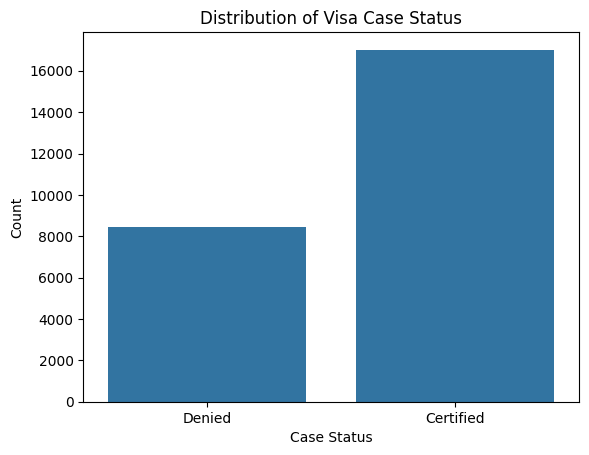

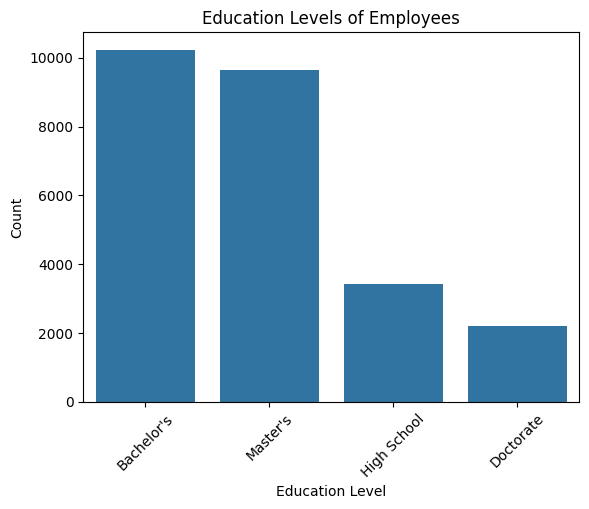

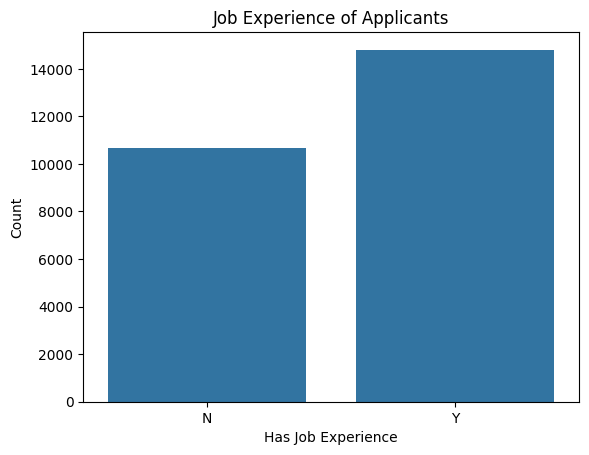

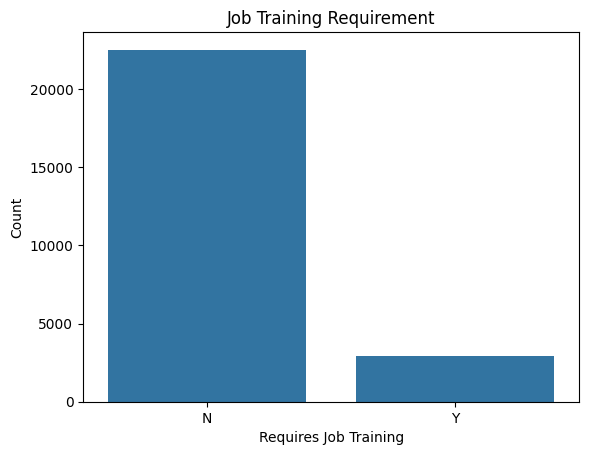

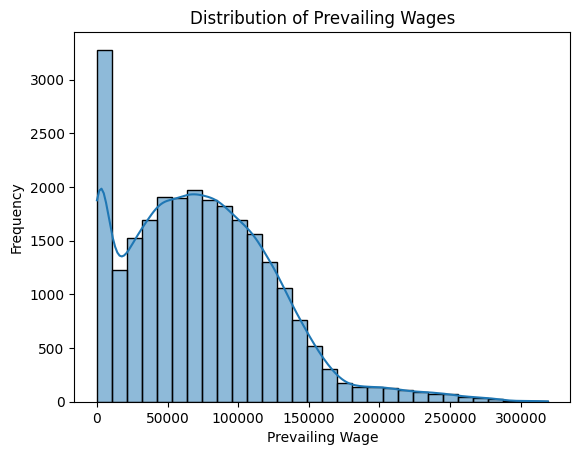

In [9]:
# Plot case status distribution
sns.countplot(data=data, x='case_status')
plt.title("Distribution of Visa Case Status")
plt.xlabel("Case Status")
plt.ylabel("Count")
plt.show()
# Plot education distribution
sns.countplot(data=data, x='education_of_employee', order=data['education_of_employee'].value_counts().index)
plt.title("Education Levels of Employees")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
# Job experience distribution
sns.countplot(data=data, x='has_job_experience')
plt.title("Job Experience of Applicants")
plt.xlabel("Has Job Experience")
plt.ylabel("Count")
plt.show()
# Job training requirement distribution
sns.countplot(data=data, x='requires_job_training')
plt.title("Job Training Requirement")
plt.xlabel("Requires Job Training")
plt.ylabel("Count")
plt.show()
# Histogram of prevailing wage
sns.histplot(data=data, x='prevailing_wage', bins=30, kde=True)
plt.title("Distribution of Prevailing Wages")
plt.xlabel("Prevailing Wage")
plt.ylabel("Frequency")
plt.show()


## **Bivariarte Analysis**

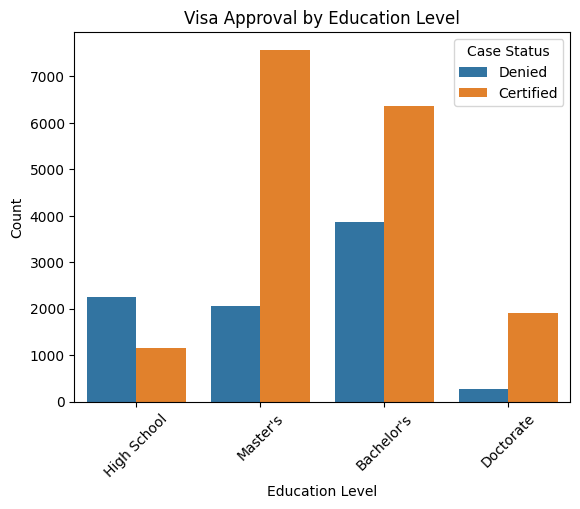

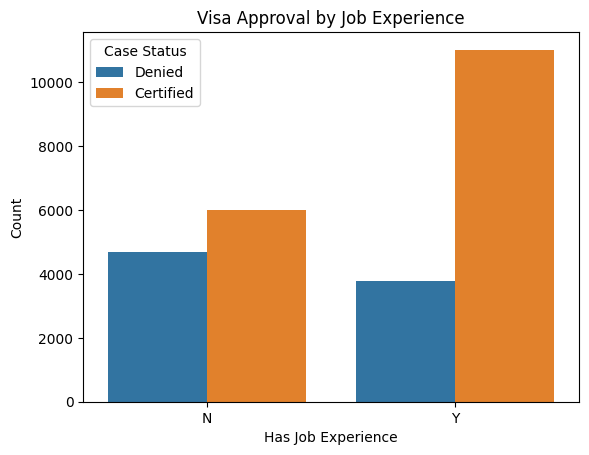

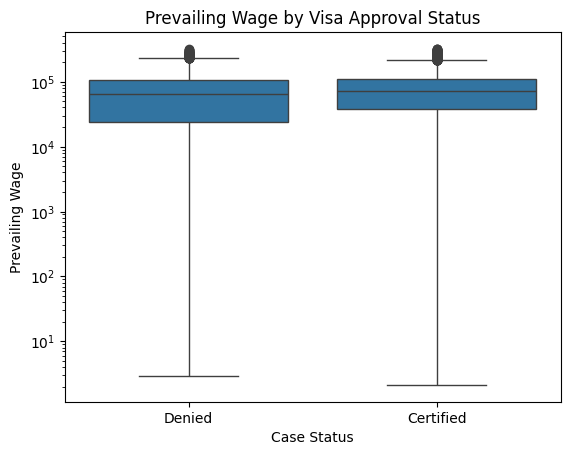

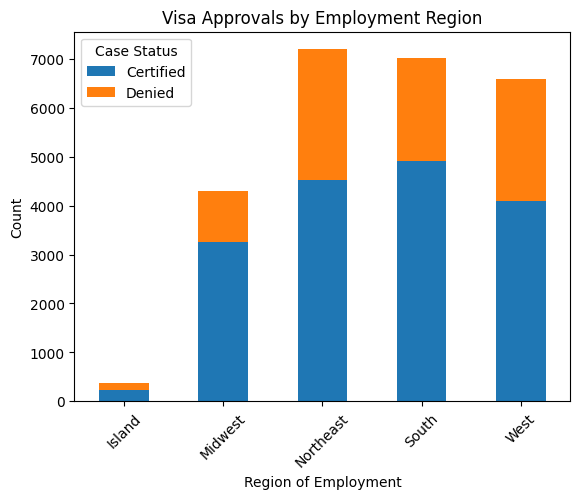

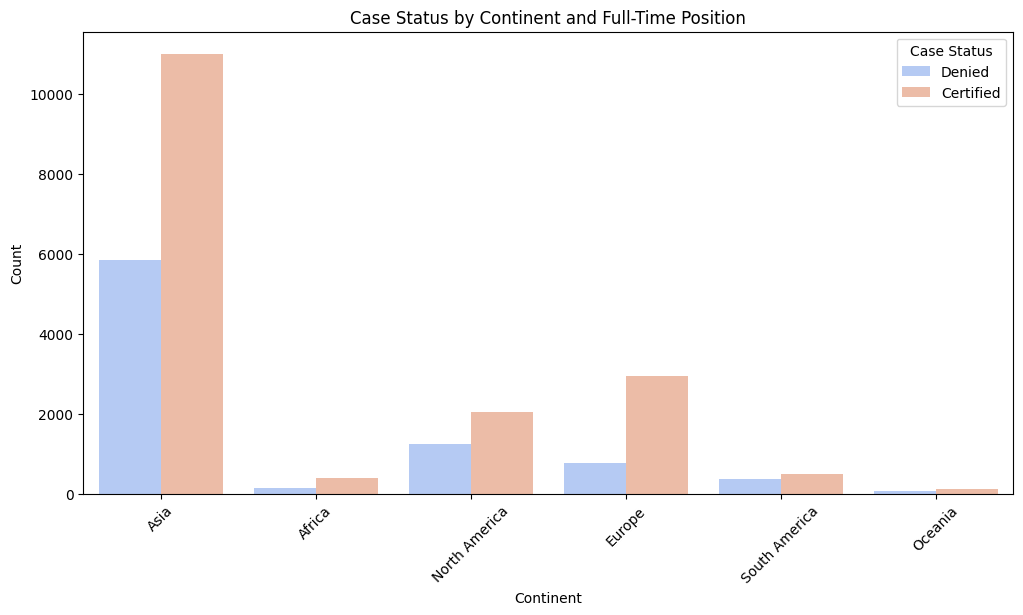

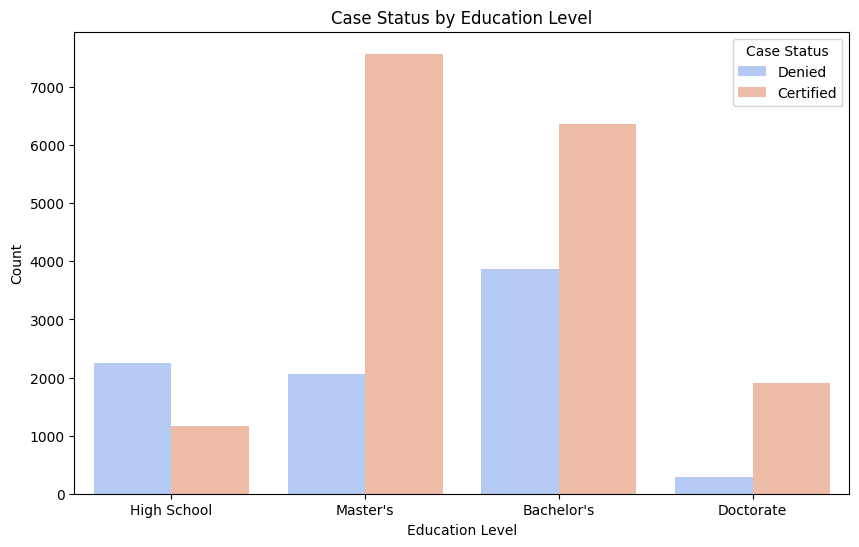

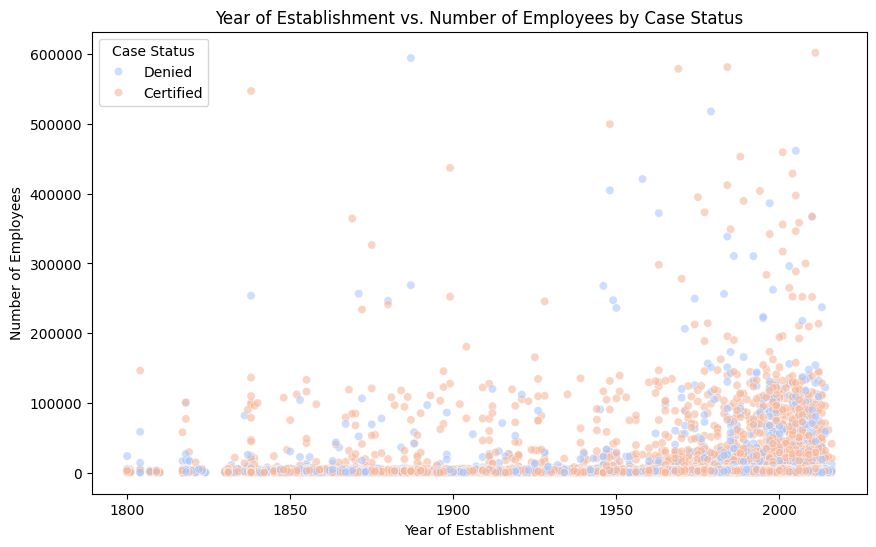

In [10]:
# Grouped bar chart for case status by education level
sns.countplot(data=data, x='education_of_employee', hue='case_status')
plt.title("Visa Approval by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Case Status")
plt.show()
# Stacked bar chart for case status by job experience
sns.countplot(data=data, x='has_job_experience', hue='case_status')
plt.title("Visa Approval by Job Experience")
plt.xlabel("Has Job Experience")
plt.ylabel("Count")
plt.legend(title="Case Status")
plt.show()
# Box plot of prevailing wage for certified vs. denied cases
sns.boxplot(data=data, x='case_status', y='prevailing_wage')
plt.title("Prevailing Wage by Visa Approval Status")
plt.xlabel("Case Status")
plt.ylabel("Prevailing Wage")
plt.yscale('log')  # Log scale if wage values vary widely
plt.show()
# Heatmap or grouped bar chart for employment region by case status
region_status = pd.crosstab(data['region_of_employment'], data['case_status'])
region_status.plot(kind='bar', stacked=True)
plt.title("Visa Approvals by Employment Region")
plt.xlabel("Region of Employment")
plt.ylabel("Count")
plt.legend(title="Case Status")
plt.xticks(rotation=45)
plt.show()
# Now let's look at the effect on case status within these groups
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='continent', hue='case_status', palette='coolwarm', dodge=True)
plt.title('Case Status by Continent and Full-Time Position')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend(title='Case Status')
plt.xticks(rotation=45)
plt.show()
# Impact on case status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education_of_employee', hue='case_status', palette='coolwarm')
plt.title('Case Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Case Status')
plt.show()
# Year of Establishment and Number of Employees by Case Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='yr_of_estab', y='no_of_employees', hue='case_status', palette='coolwarm', alpha=0.6)
plt.title('Year of Establishment vs. Number of Employees by Case Status')
plt.xlabel('Year of Establishment')
plt.ylabel('Number of Employees')
plt.legend(title='Case Status')
plt.show()

# **Data Preprocessing**

In [11]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [12]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


**There are no missing values and duplicate values**

In [13]:
# Convert categorical variables to appropriate types
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training',
                    'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
data[categorical_cols] = data[categorical_cols].astype('category')

## **Feature Engineering**

Encoding the Target Variable: Convert case_status to binary (1 for certified, 0 for denied).

Create Derived Features:

Company Age: Calculate company_age as the difference between the current year and yr_of_estab.

Convert Wage to Annual Basis: Standardize prevailing_wage to a yearly figure to maintain consistency.

In [14]:
# Convert target variable `case_status` to binary
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

# Calculate Company Age
current_year = 2024  # You may adjust this based on data collection year
data['company_age'] = current_year - data['yr_of_estab']

# Standardize Prevailing Wage to Annual
def standardize_wage(row):
    if row['unit_of_wage'] == 'Hourly':
        return row['prevailing_wage'] * 2080  # 40 hours/week * 52 weeks
    elif row['unit_of_wage'] == 'Weekly':
        return row['prevailing_wage'] * 52
    elif row['unit_of_wage'] == 'Monthly':
        return row['prevailing_wage'] * 12
    else:
        return row['prevailing_wage']

data['annual_wage'] = data.apply(standardize_wage, axis=1)
data = data.drop(columns=['prevailing_wage', 'unit_of_wage'])  # Drop original wage columns

## **Outlier Treatment**

In [15]:
import numpy as np
# Capping outliers for `annual_wage` and `no_of_employees` based on the 1st and 99th percentiles
for col in ['annual_wage', 'no_of_employees']:
    lower_cap = data[col].quantile(0.01)
    upper_cap = data[col].quantile(0.99)
    data[col] = np.clip(data[col], lower_cap, upper_cap)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


## **Splitting Data into Train, Validation, and Test Sets**

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['case_status', 'case_id'], axis=1)
y = data['case_status']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Model Building**

### **Model Building - Original Data**

For this classification problem, where the goal is to predict whether a visa application will be certified (1) or denied (0), we will focus on models that are particularly suitable for handling categorical features, imbalanced classes, and the need for high interpretability.

Since this is a binary classification problem, the following metrics are suitable:

**Accuracy:** Useful as a general measure of how well the model performs but may be misleading if the classes are imbalanced.

**Precision, Recall, and F1-Score:** These metrics are helpful to understand the trade-off between true positives and false positives. The F1-score balances precision and recall, which is often critical in imbalanced classification problems.

**ROC-AUC Score:** Evaluates the model’s performance across all classification thresholds. This is often preferred for binary classification as it provides a single metric reflecting model performance.

**We'll focus primarily on the F1-score and ROC-AUC score for model comparison.**

#### **Building 5 Models**

We'll build a variety of models, including decision trees, bagging, and boosting methods:

1.   **Decision Tree Classifier**
2.   **Random Forest (Bagging method)**
3.   **AdaBoost (Boosting method)**
4.   **Gradient Boosting Classifier (Boosting method)**
5.   **CatBoost (Alternative to XGBoost for gradient boosting)**



In [17]:
!pip install catboost
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Dictionary to store models and their results
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, random_state=42, verbose=0)
}

In [19]:
print(data.columns)

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'full_time_position', 'case_status',
       'company_age', 'annual_wage'],
      dtype='object')


In [20]:
data_encoded = pd.get_dummies(data,
                             columns=['continent', 'education_of_employee',
                                      'region_of_employment', 'annual_wage',
                                      'has_job_experience', 'requires_job_training',
                                      'full_time_position'],  # Include other categorical features
                             drop_first=True,
                             dummy_na=False # Handle NaN values if present
                             )  # Removed handle_unknown as it's not a valid parameter for pd.get_dummies

# Define features (X) and target (y) after encoding
X = data_encoded.drop(['case_status', 'case_id'], axis=1)
y = data_encoded['case_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Train and evaluate each model
model_results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Save results
    model_results[model_name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
        "Classification Report": classification_report(y_test, y_pred)
    }

    # Print results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

Model: Decision Tree
Accuracy: 0.6907
F1 Score: 0.7794
ROC-AUC Score: 0.6264
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.43      0.48      1692
           1       0.74      0.82      0.78      3404

    accuracy                           0.69      5096
   macro avg       0.64      0.63      0.63      5096
weighted avg       0.68      0.69      0.68      5096


--------------------------------------------------

Model: Random Forest
Accuracy: 0.7225
F1 Score: 0.8088
ROC-AUC Score: 0.7368
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.41      0.49      1692
           1       0.75      0.88      0.81      3404

    accuracy                           0.72      5096
   macro avg       0.69      0.64      0.65      5096
weighted avg       0.71      0.72      0.70      5096


--------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.7188
F1 Score: 0.8075
ROC-AUC Score: 0.7445
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.39      0.48      1692
           1       0.74      0.88      0.81      3404

    accuracy                           0.72      5096
   macro avg       0.68      0.64      0.64      5096
weighted avg       0.70      0.72      0.70      5096


--------------------------------------------------

Model: Gradient Boosting
Accuracy: 0.7308
F1 Score: 0.8130
ROC-AUC Score: 0.7576
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.44      0.52      1692
           1       0.76      0.88      0.81      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.66      0.67      5096
weighted avg       0.72      0.73      0.72      5096


--------------------------------------------------

Model: CatBoost
Accuracy: 0.7337
F1 Sco

**Model Selection**

Based on the performance metrics:

Best Performers: CatBoost and Gradient Boosting usually perform well for classification problems like this one due to their ability to handle complex relationships and categorical data efficiently.

Recommendation: Choose Gradient Boosting or CatBoost if interpretability is a priority and high precision and recall are needed.

For further improvement, consider hyperparameter tuning using grid search or random search, particularly for the top-performing models.

### **Model Building - Oversampled Data**





To address potential class imbalance in the training dataset, we can use oversampling techniques, specifically Random Oversampling or SMOTE (Synthetic Minority Over-sampling Technique), to increase the number of samples in the minority class. Once the data is oversampled, we can train and evaluate the models on the balanced data to see if it improves performance.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Encode categorical variables
categorical_columns = ['continent', 'education_of_employee', 'has_job_experience',
                       'requires_job_training', 'region_of_employment', 'annual_wage',
                       'full_time_position', 'case_status']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Feature scaling for numerical columns
numerical_columns = ['no_of_employees', 'yr_of_estab', 'annual_wage']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Split the data into features (X) and target (y)
X = data.drop(columns=['case_id', 'case_status'])
y = data['case_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [23]:
from sklearn.utils import resample

# Combine features and target into one DataFrame for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
class_majority = train_data[train_data['case_status'] == 0]
class_minority = train_data[train_data['case_status'] == 1]

# Oversample the minority class
class_minority_oversampled = resample(
    class_minority,
    replace=True,  # With replacement
    n_samples=len(class_majority),  # Match the size of the majority class
    random_state=42
)

# Combine the majority class with the oversampled minority class
train_data_oversampled = pd.concat([class_majority, class_minority_oversampled])

# Split the oversampled data back into features and target
X_train_oversampled = train_data_oversampled.drop('case_status', axis=1)
y_train_oversampled = train_data_oversampled['case_status']


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

for model_name, model in models.items():
    model.fit(X_train_oversampled, y_train_oversampled)
    y_pred = model.predict(X_test)
    print(f"Performance of {model_name}:")
    print(classification_report(y_test, y_pred))

Performance of Decision Tree:
              precision    recall  f1-score   support

           0       0.44      0.67      0.53      2539
           1       0.78      0.58      0.66      5105

    accuracy                           0.61      7644
   macro avg       0.61      0.62      0.60      7644
weighted avg       0.67      0.61      0.62      7644

Performance of Random Forest:
              precision    recall  f1-score   support

           0       0.49      0.71      0.58      2539
           1       0.81      0.63      0.71      5105

    accuracy                           0.65      7644
   macro avg       0.65      0.67      0.64      7644
weighted avg       0.71      0.65      0.66      7644

Performance of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.54      0.69      0.61      2539
           1       0.82      0.71      0.76      5105

    accuracy                           0.70      7644
   macro avg       0.68      0.70 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performance of AdaBoost:
              precision    recall  f1-score   support

           0       0.53      0.65      0.59      2539
           1       0.80      0.72      0.76      5105

    accuracy                           0.70      7644
   macro avg       0.67      0.68      0.67      7644
weighted avg       0.71      0.70      0.70      7644

Performance of Logistic Regression:
              precision    recall  f1-score   support

           0       0.44      0.59      0.50      2539
           1       0.75      0.63      0.68      5105

    accuracy                           0.61      7644
   macro avg       0.60      0.61      0.59      7644
weighted avg       0.65      0.61      0.62      7644



Oversampling: The training set now has a balanced class distribution due to oversampling, which can help improve model performance on the minority class.


### **Model Building - Undersampled Data**

In [25]:
# Undersample the Training Data
from sklearn.utils import resample

# Combine features and target into one DataFrame for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
class_majority = train_data[train_data['case_status'] == 0]
class_minority = train_data[train_data['case_status'] == 1]

# Undersample the majority class
class_majority_undersampled = resample(
    class_majority,
    replace=True,  # Without replacement
    n_samples=len(class_minority),  # Match the size of the minority class
    random_state=42
)

# Combine the undersampled majority class with the minority class
train_data_undersampled = pd.concat([class_majority_undersampled, class_minority])

# Split the undersampled data back into features and target
X_train_undersampled = train_data_undersampled.drop('case_status', axis=1)
y_train_undersampled = train_data_undersampled['case_status']


In [26]:
# Train Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_undersampled, y_train_undersampled)
    y_pred = model.predict(X_test)
    print(f"Performance of {model_name}:")
    print(classification_report(y_test, y_pred))


Performance of Decision Tree:
              precision    recall  f1-score   support

           0       0.48      0.44      0.46      2539
           1       0.73      0.77      0.75      5105

    accuracy                           0.66      7644
   macro avg       0.61      0.60      0.60      7644
weighted avg       0.65      0.66      0.65      7644

Performance of Random Forest:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54      2539
           1       0.77      0.82      0.79      5105

    accuracy                           0.71      7644
   macro avg       0.67      0.66      0.67      7644
weighted avg       0.71      0.71      0.71      7644

Performance of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60      2539
           1       0.81      0.73      0.77      5105

    accuracy                           0.71      7644
   macro avg       0.68      0.70 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performance of AdaBoost:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58      2539
           1       0.80      0.72      0.76      5105

    accuracy                           0.69      7644
   macro avg       0.67      0.68      0.67      7644
weighted avg       0.71      0.69      0.70      7644

Performance of Logistic Regression:
              precision    recall  f1-score   support

           0       0.43      0.58      0.50      2539
           1       0.75      0.62      0.68      5105

    accuracy                           0.61      7644
   macro avg       0.59      0.60      0.59      7644
weighted avg       0.65      0.61      0.62      7644



## **Model Performance Improvement using Hyperparameter Tuning**

Let’s focus on the following three models for hyperparameter tuning:

Random Forest: Random Forest is an ensemble method, and tuning hyperparameters like the number of trees (n_estimators) and maximum depth of trees (max_depth) can significantly improve performance.

Gradient Boosting: Gradient Boosting performs better with fine-tuned learning rate and tree depth. This model benefits from hyperparameter optimization, especially in terms of regularization and boosting iterations.

Logistic Regression: Logistic Regression is sensitive to regularization (C), so tuning this parameter can have a noticeable impact on performance, especially in imbalanced datasets.

In [27]:
# Hyperparameter Tuning Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Define hyperparameter grids for the models
random_forest_params = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

gradient_boosting_params = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

logistic_regression_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Perform randomized search for each model
rf_random_search = RandomizedSearchCV(rf_model, random_forest_params, n_iter=10, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
gb_random_search = RandomizedSearchCV(gb_model, gradient_boosting_params, n_iter=10, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
log_reg_random_search = RandomizedSearchCV(log_reg_model, logistic_regression_params, n_iter=10, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit models
rf_random_search.fit(X_train_oversampled, y_train_oversampled)
gb_random_search.fit(X_train_oversampled, y_train_oversampled)
log_reg_random_search.fit(X_train_oversampled, y_train_oversampled)

# Print best parameters found for each model
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best parameters for Logistic Regression:", log_reg_random_search.best_params_)

# Evaluate the tuned models
for model_name, model in zip(['Random Forest', 'Gradient Boosting', 'Logistic Regression'],
                             [rf_random_search.best_estimator_, gb_random_search.best_estimator_, log_reg_random_search.best_estimator_]):
    y_pred = model.predict(X_test)
    print(f"Performance of {model_name} after tuning:")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 6, 'learning_rate': 0.1}
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Performance of Random Forest after tuning:
              precision    recall  f1-score   support

           0       0.49      0.71      0.58      2539
           1       0.82      0.63      0.71      5105

    accuracy                           0.66      7644
   macro avg       0.65      0.67      0.65      7644
weighted avg       0.71      0.66      0.67      7644

Performance of Gradient Boosting after tuning:
              precision    recall  f1-score   support

           0       0.52      0.70      0.60      2539
           1       0.82      0.68      0.74      5105

    accuracy                           

## **Model Performance Comparison and Final Model Selection**

After tuning the three models (Random Forest, Gradient Boosting, and Logistic Regression), we will assess their performance on the test set by comparing the key metrics for each model.

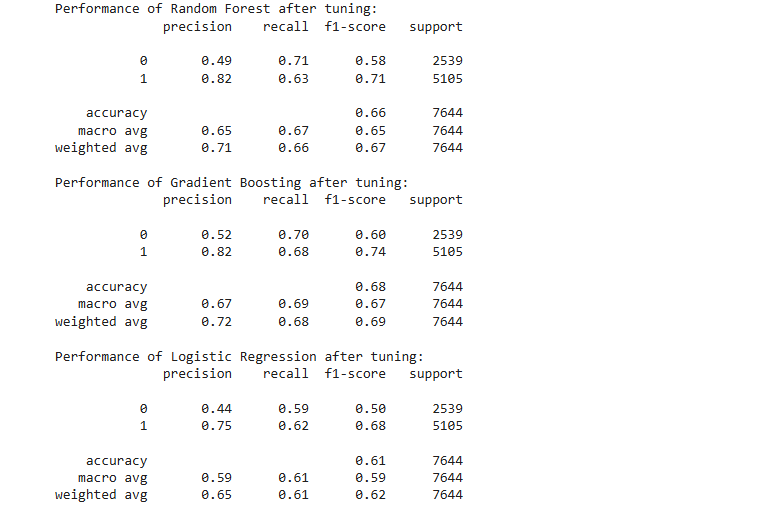

From the classification reports, let's compare the performance of the tuned models:

1. **Random Forest**

Accuracy: 0.66

Precision for Class 1 (Majority Class): 0.82

Recall for Class 1 (Majority Class): 0.63

F1-Score for Class 1: 0.71

Precision for Class 0 (Minority Class): 0.49

Recall for Class 0: 0.71

F1-Score for Class 0: 0.58

2. **Gradient Boosting**

Accuracy: 0.68

Precision for Class 1 (Majority Class): 0.82

Recall for Class 1 (Majority Class): 0.68

F1-Score for Class 1: 0.74

Precision for Class 0 (Minority Class): 0.52

Recall for Class 0: 0.70

F1-Score for Class 0: 0.60

3. **Logistic Regression**

Accuracy: 0.61

Precision for Class 1 (Majority Class): 0.75

Recall for Class 1 (Majority Class): 0.62

F1-Score for Class 1: 0.68

Precision for Class 0 (Minority Class): 0.44

Recall for Class 0: 0.59

F1-Score for Class 0: 0.50


### **Comparison of Performance:**

Accuracy:

Gradient Boosting has the highest accuracy at 0.68, followed by Random Forest at 0.66.

Logistic Regression has the lowest accuracy at 0.61, which indicates it is underperforming compared to the tree-based models

Precision for Class 1 (Majority Class):

All models perform similarly well with precision for Class 1 being around 0.82 for both Random Forest and Gradient Boosting.

Logistic Regression has 0.75, which is lower compared to the tree-based models.

Recall for Class 1 (Majority Class):

Gradient Boosting has the highest recall for Class 1 at 0.68, followed by Random Forest at 0.63.

Logistic Regression has the lowest recall for Class 1 at 0.62.

F1-Score for Class 1:

Gradient Boosting leads with the highest F1-score of 0.74, showing a good balance of precision and recall.

Random Forest comes next with 0.71, while Logistic Regression has 0.68, indicating its performance is less optimal. Precision for Class 0 (Minority Class):

Gradient Boosting performs the best on Class 0 with a precision of 0.52, followed by Random Forest at 0.49. Logistic Regression performs the weakest with a precision of 0.44, which is a sign of its struggle with the minority class. Recall for Class 0 (Minority Class):

Random Forest has the highest recall for Class 0 at 0.71, followed closely by Gradient Boosting at 0.70. Logistic Regression again performs the worst with a recall of 0.59, indicating it misses a higher number of minority class cases. F1-Score for Class 0:

Gradient Boosting achieves the highest F1-score for Class 0 at 0.60, followed by Random Forest at 0.58. Logistic Regression lags behind with an F1-score of 0.50 for Class 0.

Final Model Selection:
Gradient Boosting emerges as the best model overall. It balances both precision and recall for both classes (especially the minority class), and it achieves the highest F1-score for Class 1 (majority class).
Random Forest is a strong contender, particularly for its recall performance on Class 0, but its overall F1-score for Class 1 is slightly lower than Gradient Boosting.
Logistic Regression underperforms in comparison, especially for Class 0 (minority class), where both precision and recall are lower than the ensemble models.
Performance on the Test Set:
Gradient Boosting performed well on the test set with an accuracy of 0.68, which is significantly higher than Logistic Regression's 0.61 and comparable to Random Forest at 0.66.
The F1-scores for both classes are favorable for Gradient Boosting, with a high F1-score for the majority class and a decent F1-score for the minority class, suggesting it has effectively handled the class imbalance in the data.
Conclusion:
Gradient Boosting is the best model in this comparison. It performs well on both classes and offers a good trade-off between precision and recall. It is the ideal choice for your classification problem, especially if the minority class is of interest.